In [ ]:
"""
context: NCAA March Madness final tiebreaker 
https://help.yahoo.com/kb/SLN6654.html


Comparison of the following metrics for
The set C = {contestants i with some predicted (w_i, l_i) score}:

T1: "Closest prediction of total points scored by both teams wins"
T1 = min_i(|(w_i + l_i) - (w + l)|)

T2: "Closest predictions of actual winning and losing scores"
T2 = min_i(|w_i - w| + |l_i - l|)


Goal: 
Determine which metric is better

The "Best" metric 
    - is able to determine a singular winner
        - maximizes the number of losers (thereby minimizing the number of winners)


Inputs:
The set C where all contestants are tied and depend on one of the above tiebreakers

"""

In [32]:
import numpy as np
from scipy import stats 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


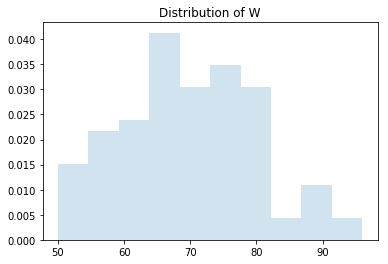

In [169]:
# Define arrays W, L with winning and losing prediction scores defined by a normal distribution
# The normal distribution is centered around 70 for winners 65 for losers with a std dev of 10
# I took the average difference of our bracket for the difference between the mean of W and L
# I guessed for the standard deviation 
# I guessed 70 for the mean winning score
# sue me

# Number of samples – Also subject to some degree of uncertainty but that's for another day
size = 100

# Elements of array sampled randomly from the normal distribution
W = norm.rvs(loc = 70, scale = 10, size = size)
L = norm.rvs(loc = 65, scale = 10, size = size)

# Rount to integers
W = np.rint(W)
L = np.rint(L)

fig, ax = plt.subplots(1,1)

ax.hist(W, normed=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribution of W')
plt.show()

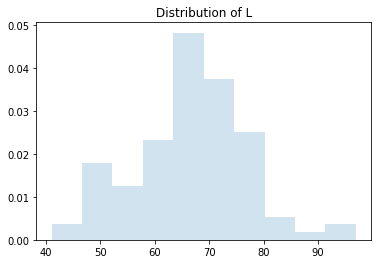

In [170]:
fig, ax = plt.subplots(1,1)
ax.hist(L, normed=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribution of L')
plt.show()

In [74]:
# Now comparing metrics T1, T2
# Actual scores taken from the 2018 Championship Game
# Would probably be more telling to take an average of past games but whatever

w = 79
l = 62

# Creates array of Tiebreaking scores 
# Winners are the minimum values (ie. 0 = perfect prediction)
T1 = np.abs((W + L) - (w + l))
T2 = np.abs(W - w) + np.abs(L - l)

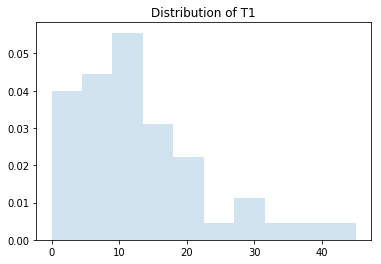

In [173]:
fig, ax = plt.subplots(1,1)
ax.hist(T1, normed=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribution of T1')
plt.show()

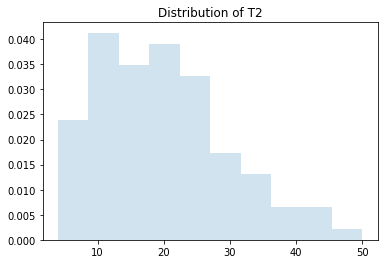

In [174]:
fig, ax = plt.subplots(1,1)
ax.hist(T2, normed=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribution of T2')
plt.show()

In [133]:
# Calculate proportion of winners to losers
# Best = 1:99

def howGood(a):
    a = np.sort(a)
    small = np.amin(a)
    counter = 0
    for i in range(1, a.size-1):
        if a[i] == small:
            counter += 1
        else:
            break
   # print("Winners:Losers is ", counter+1, ":", a.size-(counter+1))
    return counter
        


In [105]:
howGood(T1)
howGood(T2)

Winners:Losers is  1 : 99
Winners:Losers is  1 : 99


1

In [ ]:
"""
Now we gotta do this thousands of times

Results Array: Each element of the vector counts the frequency of that occurence
ie.
A[2] = 10
means that there were 10 simulations with 2 winners

"""

In [111]:
# Create a function of the above

def aBracket(size=100):
    W = norm.rvs(loc = 70, scale = 10, size = size)
    L = norm.rvs(loc = 65, scale = 10, size = size)
    W = np.rint(W)
    L = np.rint(L)

    w = 79
    l = 62

    T1 = np.abs((W + L) - (w + l))
    T2 = np.abs(W - w) + np.abs(L - l)

    return howGood(T1), howGood(T2)

In [166]:
# Initialize results array
samples = 1000

A1 = np.zeros(100)
A2 = np.zeros(100)

for i in range(samples):
    a1, a2 = aBracket()
    
    A1[a1] += 1
    A2[a2] += 1
    
    
#print(A1, A2)


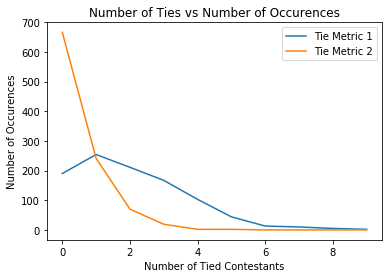

In [182]:
fig, ax = plt.subplots(1,1)
ax.plot([x for x in range(10)], A1[:10], label="Tie Metric 1")
ax.plot([x for x in range(10)], A2[:10], label="Tie Metric 2")
ax.legend()
plt.title("Number of Ties vs Number of Occurences")
plt.xlabel("Number of Tied Contestants")
plt.ylabel("Number of Occurences")
plt.show()

In [ ]:
"""
I don't actually know if this shows anything statistically significant 
but it looks to me like Tie Metric 2 results in significantly less ties
than Metric 1. 


WHATS UP WITH THAT YAHOO???
"""